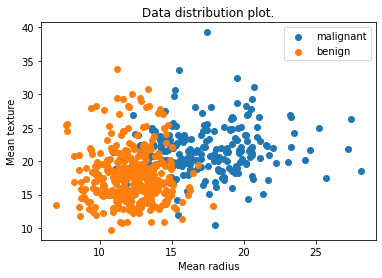

In [78]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
np.random.seed(5)

def load_data():
    data = load_breast_cancer()
    inputs = data['data']
    outputs = data['target']
    output_names = data['target_names']
    feature_names = list(data['feature_names'])
    feature1 = [feat[feature_names.index('mean radius')] for feat in inputs]
    feature2 = [feat[feature_names.index('mean texture')] for feat in inputs]
    inputs = [[feat1, feat2] for feat1, feat2 in zip(feature1, feature2)]
    return feature1, feature2, inputs, outputs, output_names


def plot_data(inputs, outputs, features, output_names):
    labels = set(outputs)
    data_size = len(inputs)
    for label in labels:
        x = [feature for feature, output_label in zip(features[0], outputs) if output_label == label]
        y = [feature for feature, output_label in zip(features[1], outputs) if output_label == label]
        plt.scatter(x, y, label = output_names[label])
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')
    plt.legend()
    plt.title("Data distribution plot.")
    plt.show()

feature1, feature2, inputs, outputs, output_names = load_data()
plot_data(inputs, outputs, [feature1, feature2], output_names)


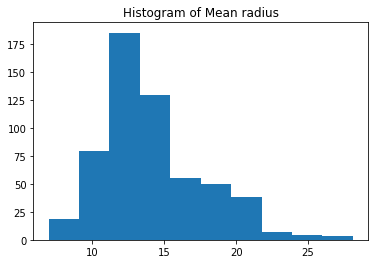

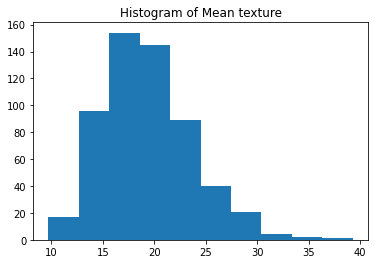

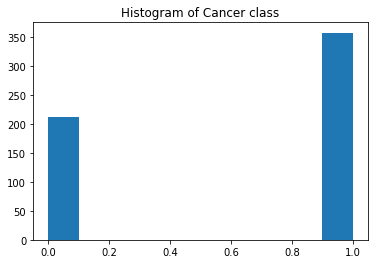

In [79]:
def plot_data_histogram(x, name):
    _ = plt.hist(x, 10)
    plt.title("Histogram of " + name)
    plt.show()

plot_data_histogram(feature1, 'Mean radius')
plot_data_histogram(feature2, 'Mean texture')
plot_data_histogram(outputs, 'Cancer class')

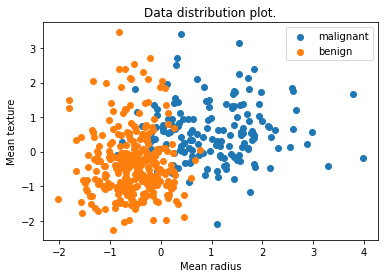

In [80]:
def normalisation(train_data, test_data):
    scaler = StandardScaler()
    if not isinstance(train_data[0], list):
        # for one feature only
        train_data = [[row] for row in train_data]
        test_data = [[row] for row in test_data]
        scaler.fit(train_data)
        normalized_train_data = [row[0] for row in scaler.transform(train_data)]
        normalized_test_data = [row[0] for row in scaler.transform(test_data)]
        return normalized_train_data, normalized_test_data
    # for input with more than one feature
    scaler.fit(train_data)
    normalized_train_data = scaler.transform(train_data)
    normalized_test_data = scaler.transform(test_data)
    return normalized_train_data, normalized_test_data

def split_in_train_and_test(inputs, outputs):
    indexes = [i for i in range(len(inputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    validation_sample = [i for i in indexes if not i in train_sample]
    train_inputs = [inputs[i] for i in train_sample]
    train_outputs = [outputs[i] for i in train_sample]
    validation_inputs = [inputs[i] for i in validation_sample]
    validation_outputs = [outputs[i] for i in validation_sample]
    return train_inputs, train_outputs, validation_inputs, validation_outputs

train_inputs, train_outputs, validation_inputs, validation_outputs = split_in_train_and_test(inputs, outputs)
train_inputs, validation_inputs = normalisation(train_inputs, validation_inputs)
feature1 = [row[0] for row in train_inputs]
feature2 = [row[1] for row in train_inputs]
plot_data(train_inputs, train_outputs, [feature1, feature2], output_names)


In [81]:
def plot_predictions(features, real_outputs, predicted_outputs, title, label_names):
    labels = list(set(real_outputs))
    data_size = len(feature2)
    for label in labels:
        x = [feature for feature, real_output_label, predicted_outputs_label in zip(features[0], real_outputs, predicted_outputs) if predicted_outputs_label == real_output_label == label]
        y = [feature for feature, real_output_label, predicted_outputs_label in zip(features[1], real_outputs, predicted_outputs) if predicted_outputs_label == real_output_label == label]
        plt.scatter(x, y, label=label_names[label] + ' correct.')
    for label in labels:
        x = [feature for feature, real_output_label, predicted_outputs_label in zip(features[0], real_outputs, predicted_outputs) if predicted_outputs_label != real_output_label == label]
        y = [feature for feature, real_output_label, predicted_outputs_label in zip(features[1], real_outputs, predicted_outputs) if predicted_outputs_label != real_output_label == label]
        plt.scatter(x, y, label=label_names[label] + ' incorrect.')
    plt.xlabel("Mean radius.")
    plt.ylabel("Mean texture.")
    plt.legend()
    plt.title(title)
    plt.show()

Classification model: y(feature1, feature2) = 0.9128165793008213 + -3.7164872586595252 * feature1 + -0.9223715121269123 * feature2.


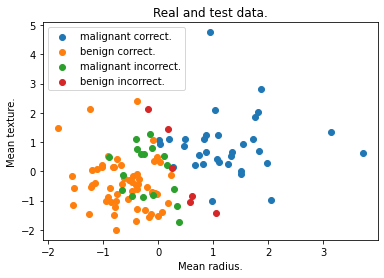

In [82]:
def train_model_by_tool(train_inputs, train_outputs):
    classifier = linear_model.LogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    return classifier

def train_model_by_me(train_inputs, train_outputs):
    import LogisticRegression
    classifier = LogisticRegression.MyLogisticRegression()
    classifier.fit(train_inputs, train_outputs)
    return classifier


classifier = train_model_by_tool(train_inputs, train_outputs)
# classifier = train_model_by_me(train_inputs, train_outputs)
w0, w1, w2 = *classifier.intercept_, *classifier.coef_[0]
print("Classification model: y(feature1, feature2) =", w0, '+', w1, '* feature1 +', w2, '* feature2.')
plot_predictions([[feature[0] for feature in validation_inputs], [feature[1] for feature in validation_inputs]], validation_outputs, classifier.predict(validation_inputs), "Real and test data.", output_names)

In [83]:
def calculate_accuracy(predicted_outputs, real_outputs):
    error = float(0)
    for predict, real in zip(predicted_outputs, real_outputs):
        if predict != real:
            error += 1
    manual_error = error / len(predicted_outputs)
    tool_error = 1 - accuracy_score(real_outputs, predicted_outputs)
    return manual_error, tool_error

manual_error, tool_error = calculate_accuracy(classifier.predict(validation_inputs), validation_outputs)
print('Classification error by me:', manual_error)
print('Classification error by tool:', manual_error)
print('Accuracy score:', classifier.score(validation_inputs, validation_outputs))

Classification error by me: 0.20175438596491227
Classification error by tool: 0.20175438596491227
Accuracy score: 0.7982456140350878
